In [1]:
import numpy as np
import matplotlib.pyplot as plt
import phoebe
import matplotlib.cbook
import warnings
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
warnings.filterwarnings('ignore')
logger = phoebe.logger('WARNING')
%matplotlib inline

In [2]:
b = phoebe.open('models/after_estimators.bundle')

In [3]:
b.run_compute('phoebe01',model='after_estimators',overwrite=True)

100%|█████████████████████████████████████████████████████████████████████████| 501/501 [03:14<00:00,  2.58it/s]


<ParameterSet: 8 parameters | kinds: lc, rv>

Fri, 10 Sep 2021 03:44 matplotlib.axes._axes WARNING *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


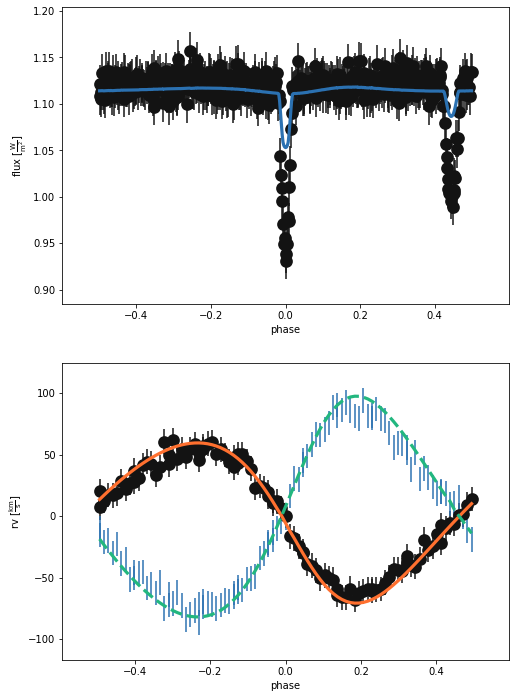

(<autofig.figure.Figure | 2 axes | 6 call(s)>,
 <Figure size 576x864 with 2 Axes>)

In [4]:
b.plot(x='phases',show=True)

In [5]:
b.set_value_all('pblum_mode', 'dataset-scaled')
b.set_value_all('ld_mode','manual')

In [6]:
b.add_compute('ellc',compute='nm_fit',overwrite=True)

<ParameterSet: 33 parameters | datasets: rv01, lc01, _default>

In [7]:
b.flip_constraint('teff@primary',solve_for='teffratio')

<ConstraintParameter: {teffratio@binary@component} = {teff@secondary@component} / {teff@primary@component} (solar units) => 0.8881701405483933>

In [8]:
b.remove_solution('nm_sol')

<ParameterSet: EMPTY>

In [9]:
b.add_distribution({'teff@primary':phoebe.gaussian(7700,300),
                    'teff@secondary':phoebe.gaussian(7200,300),
                    'requiv@secondary':phoebe.gaussian(1.29,0.3),
                    'incl@binary':phoebe.gaussian(84,2),
                    'q':phoebe.gaussian(0.750,.01),
                    'ecc':phoebe.gaussian(0.19,0.09),
                    'per0':phoebe.gaussian(116,5)},
                    distribution='mydist',overwrite_all=True)

<ParameterSet: 7 parameters | components: primary, binary, secondary>

In [10]:
b.add_solver('optimizer.nelder_mead',
             fit_parameters=['teff@primary','teff@secondary', 'requivsumfrac','requiv@secondary', 'incl@binary', 'q', 'ecc', 'per0'],
             compute='nm_fit',solver='nm_solver',overwrite=True)

Fri, 10 Sep 2021 03:44 BUNDLE       WARNING fit_parameters contains a parameter (['per0']) that affects phasing which could cause issues with mask_phases
Fri, 10 Sep 2021 03:44 BUNDLE       WARNING fit_parameters contains a parameter (['per0']) that affects phasing which could cause issues with mask_phases


<ParameterSet: 12 parameters | qualifiers: fatol, initial_values, compute, priors, maxiter, xatol, expose_lnprobabilities, maxfev, adaptive, comments, priors_combine, fit_parameters>

In [11]:
phoebe.multiprocessing_set_nprocs(8)
phoebe.multiprocessing_on()


In [12]:
b['priors@nm_solver@solver']='mydist'

Fri, 10 Sep 2021 03:44 BUNDLE       WARNING fit_parameters contains a parameter (['per0']) that affects phasing which could cause issues with mask_phases


In [13]:
print(b.get_solver('nm_solver'))

ParameterSet: 12 parameters
        comments@nm_solver@solver: 
         compute@nm_solver@solver: nm_fit
   expose_lnprobabilities@nm_s...: False
   fit_parameters@nm_solver@so...: ['teff@primary', 'teff@secondary', 'requivsumfrac', 'requiv@secondary', 'incl@binary', 'q', 'ecc', 'per0']
   initial_values@nm_solver@so...: {}
          priors@nm_solver@solver: ['mydist']
   priors_combine@nm_solver@so...: and
         maxiter@nm_solver@solver: 1000000
          maxfev@nm_solver@solver: 1000000
        adaptive@nm_solver@solver: False
           xatol@nm_solver@solver: 0.0001
           fatol@nm_solver@solver: 0.0001


In [14]:
b.run_solver(solver='nm_solver', maxiter=3000, solution='nm_sol',overwrite=True)

Fri, 10 Sep 2021 03:44 BUNDLE       WARNING fit_parameters contains a parameter (['per0']) that affects phasing which could cause issues with mask_phases
Fri, 10 Sep 2021 03:44 BUNDLE       WARNING fit_parameters contains a parameter (['per0']) that affects phasing which could cause issues with mask_phases
  0%|                                                                                  | 0/3000 [00:00<?, ?it/s]Fri, 10 Sep 2021 03:44 PARAMETERS   WARNING wrapping value of mean_anom to 251.4177564097831 deg
Fri, 10 Sep 2021 03:44 PARAMETERS   WARNING wrapping value of mean_anom to 246.15525265723852 deg
Fri, 10 Sep 2021 03:44 PARAMETERS   WARNING wrapping value of mean_anom to 255.8624540574387 deg
  0%|                                                                       | 1/3000 [00:19<16:33:30, 19.88s/it]Fri, 10 Sep 2021 03:45 PARAMETERS   WARNING wrapping value of mean_anom to 252.32966281762185 deg
Fri, 10 Sep 2021 03:45 PARAMETERS   WARNING wrapping value of mean_anom to 252

<ParameterSet: 13 parameters | qualifiers: adopt_distributions, niter, adopt_values, initial_values, fitted_uniqueids, fitted_values, fitted_units, nfev, adopt_parameters, success, comments, message, fitted_twigs>

In [15]:
print(b.get_solution('nm_sol').filter(qualifier=['message', 'nfev', 'niter', 'success']))

ParameterSet: 4 parameters
R         message@nm_sol@solution: Optimization terminated successfully.
R            nfev@nm_sol@solution: 1604
R           niter@nm_sol@solution: 1029
R         success@nm_sol@solution: True


In [16]:
print(b.adopt_solution('nm_sol', trial_run=True))

Fri, 10 Sep 2021 07:47 BUNDLE       WARNING solution='nm_sol' is not included in run_checks_solution@setting, so will not raise interactive warnings


ParameterSet: 8 parameters
      teff@primary@star@component: 7573.666942248186 K
    teff@secondary@star@component: 7333.976018438685 K
   requivsumfrac@binary@orbit@...: 0.1556434474940599
   requiv@secondary@star@compo...: 1.5038066695337884 solRad
      incl@binary@orbit@component: 86.02924500042928 deg
         q@binary@orbit@component: 0.7492861036724308
       ecc@binary@orbit@component: 0.18194687420075856
      per0@binary@orbit@component: 118.12521806546482 deg


In [19]:
b.adopt_solution('nm_sol')

Fri, 10 Sep 2021 08:41 BUNDLE       WARNING solution='nm_sol' is not included in run_checks_solution@setting, so will not raise interactive warnings
Fri, 10 Sep 2021 08:41 BUNDLE       WARNING fit_parameters contains a parameter (['per0']) that affects phasing which could cause issues with mask_phases
Fri, 10 Sep 2021 08:41 BUNDLE       WARNING fit_parameters contains a parameter (['per0']) that affects phasing which could cause issues with mask_phases
Fri, 10 Sep 2021 08:41 BUNDLE       WARNING fit_parameters contains a parameter (['per0']) that affects phasing which could cause issues with mask_phases
Fri, 10 Sep 2021 08:41 BUNDLE       WARNING fit_parameters contains a parameter (['per0']) that affects phasing which could cause issues with mask_phases
Fri, 10 Sep 2021 08:41 BUNDLE       WARNING fit_parameters contains a parameter (['per0']) that affects phasing which could cause issues with mask_phases
Fri, 10 Sep 2021 08:41 BUNDLE       WARNING fit_parameters contains a parameter (

<ParameterSet: 30 parameters | contexts: dataset, component>

In [25]:
b.run_compute(compute='phoebe01', model='after_nm',overwrite=True)


100%|█████████████████████████████████████████████████████████████████████████| 501/501 [03:22<00:00,  2.47it/s]


<ParameterSet: 8 parameters | kinds: lc, rv>

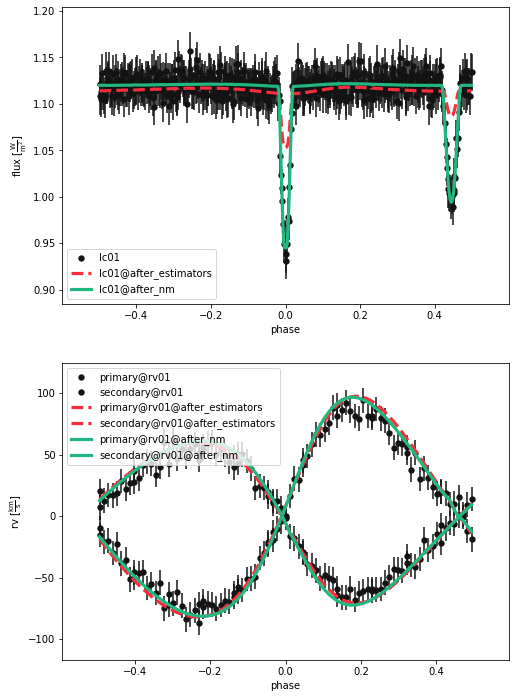

In [26]:
_ = b.plot(x='phases', 
           c={'after_estimators': 'red', 'after_nm': 'green', 'dataset': 'black'}, 
           linestyle={'after_estimators': 'dashed', 'after_nm': 'solid'},
           marker={'dataset': '.'}, show=True,legend=True)

In [28]:
b.save('models/after_optimizers.bundle')

'models/after_optimizers.bundle'